#### Bakaano-Hydro: A distributed hydrology-guided neural network model

DeepSTRMM is an advanced, distributed hydrological modeling framework that combines state-of-the-art deep learning techniques with a scientifically rigorous approach to hydrological processes. Designed to handle the complexity of watershed and river basin modeling, DeepSTRMM provides a complete, integrated solution for simulating land surface hydrological processes, river flow routing, and streamflow, from raw data processing to model deployment.

At the core of DeepSTRMM is its deep neural network architecture. The model leverages extensive data inputs—ranging from digital elevation models (DEMs) to meteorological time-series—and processes them through a robust sequence of automated steps. This includes the download, preprocessing, and alignment of source data, as well as regridding inputs to the desired spatial resolution, ensuring consistency and accuracy across all datasets.

DeepSTRMM is highly adaptable, providing users with two primary options for data input: they can either let the model automatically download and preprocess all relevant input data or supply their own datasets. If users choose the latter, DeepSTRMM accommodates them by accepting data in the widely-used WGS84 geographic coordinate system (EPSG:4326), without the need for time-consuming clipping or regridding. The model seamlessly adjusts input data to match the DEM's spatial resolution, ensuring that all variables are consistently aligned for optimal performance.

One of the distinguishing features of DeepSTRMM is its ability to model hydrological processes across a variety of scales. Whether simulating streamflow for small headwater catchments or large river basins, the model is flexible enough to handle diverse input configurations, making it applicable to a wide range of watershed and climate conditions.

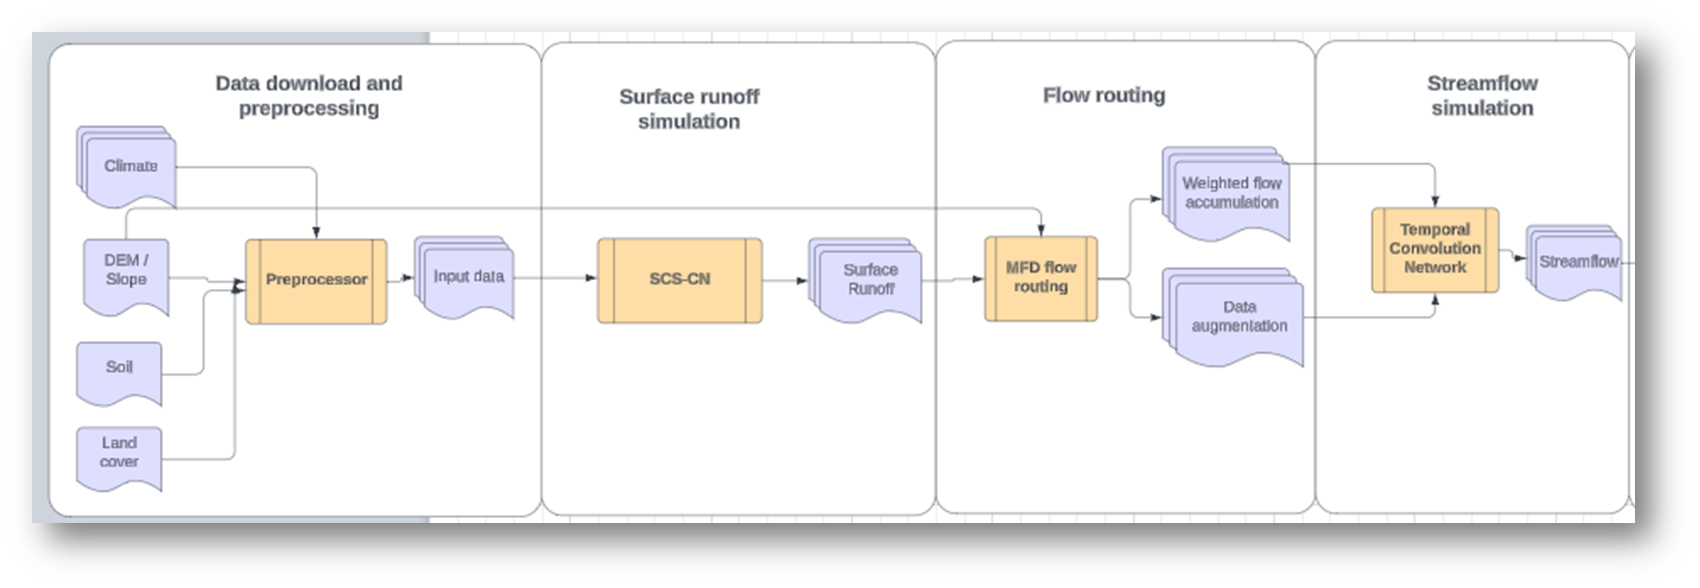

#####   Installing DeepSTRMM

#####   Getting and preprocessing input data

In [1]:
# Set working directory and path to shapefile of study area

working_dir = 'volta'
study_area = 'bakaano/test/volta.shp'

In [2]:
from bakaano.tree_cover import VCF
vf = VCF(working_dir, study_area)
vf.download_vcf()

In [ ]:
# Get elevation data

from bakaano.dem import DEM
dd = DEM(working_dir, study_area, local_data=False, local_data_path=None)
dd.get_dem_data()
dd.plot_dem()

In [ ]:
# Get land cover data

from bakaano.land_cover import LandCover
ldc = LandCover(working_dir, study_area, local_data=False, local_data_path=None)
ldc.get_landcover_data()
ldc.plot_landcover()

In [ ]:
# Get soil data

from bakaano.soil import Soil
sgd = Soil(working_dir, study_area)
sgd.get_soil_data()
sgd.plot_soil()

In [ ]:
# Get meteo data

from bakaano.meteo import Meteo
cd = Meteo(working_dir, study_area, local_data=False, local_prep_path=None, local_tasmax_path=None, 
           local_tasmin_path=None, local_tmean_path=None)
prep, tasmax, tasmin, tmean = cd.get_meteo_data()

#####   Training DeepSTRMM model 

In [ ]:
#TRAINING THE NEURAL NETWORK MODEL
# Initialize  instance of DeepSTRMM model

from bakaano.main import BakaanoAI
bk = BakaanoAI(
    working_dir,
    study_area,
    '2016-01-01',
    '2016-12-31'
)

In [ ]:
# compute surface runoff and route it to river network

bk.compute_runoff_route_flow(prep, tasmax, tasmin, tmean)


In [ ]:
# Train deepSTRMM neural network model for streamflow prediction

grdc_netcdf = ''
bk.train_streamflow_model(grdc_netcdf)

#####   Evaluating DeepSTRMM model performance

In [ ]:
#EVALUATING THE NEURAL NETWORK MODEL
from bakaano.main import BakaanoAI
bk = BakaanoAI(
    working_dir,
    study_area,
    '2016-01-01',
    '2016-12-31'
)


In [ ]:
# compute surface runoff and route it to river network

bk.compute_runoff_route_flow(prep, tasmax, tasmin, tmean)

In [ ]:
# Train deepSTRMM neural network model for streamflow prediction

grdc_netcdf = ''
model_path = ''
bk.evaluate_streamflow_model(model_path, grdc_netcdf)

#####   Simulating streamflow with DeepSTRMM